<a href="https://colab.research.google.com/github/niharikamanjunatha/Image_Classifier/blob/main/Minor_Project_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [2]:
from google.colab import drive
datadir = '/content/drive/MyDrive/image_classify'

categories = ['pikachu', 'mickey mouse']
images = []
target = []
flat_data = []

for i in categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_arr = imread(os.path.join(path, img))
        img_resize = resize(img_arr, (225,225,3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(i)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [3]:
flat_data[0]

array([0.70590276, 0.70590276, 0.70590276, ..., 0.70588235, 0.70588235,
       0.70588235])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state = 42)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

grid_param = {'C': [1,10,100,1000], 'kernel':['linear','rbf']}

svc = svm.SVC(probability = True)
model = GridSearchCV(svc, grid_param)
model.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
y_pred = model.predict(x_test)

In [13]:
y_pred

array(['mickey mouse', 'mickey mouse', 'mickey mouse', 'mickey mouse',
       'pikachu', 'mickey mouse', 'mickey mouse', 'mickey mouse',
       'mickey mouse', 'pikachu', 'pikachu', 'pikachu', 'mickey mouse',
       'pikachu', 'pikachu'], dtype='<U12')

In [14]:
y_test

array(['pikachu', 'mickey mouse', 'mickey mouse', 'mickey mouse',
       'pikachu', 'mickey mouse', 'mickey mouse', 'mickey mouse',
       'mickey mouse', 'pikachu', 'pikachu', 'pikachu', 'mickey mouse',
       'pikachu', 'pikachu'], dtype='<U12')

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9333333333333333

In [16]:
confusion_matrix(y_test,y_pred)

array([[8, 0],
       [1, 6]])

In [17]:
import pickle

pickle.dump(model, open('img_model.p','wb'))

In [18]:
load_model = pickle.load(open('img_model.p','rb'))

Enter the URLhttps://www.clipartmax.com/png/middle/93-931473_pikachu-clipart-cartoon-pikachu.png
PREDICTED OUTPUT : ['pikachu']


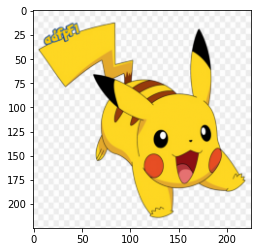

In [22]:
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resize = resize(img, (225,225,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resize)
y_out = load_model.predict(flat_data)
print(f'PREDICTED OUTPUT : {y_out}')